# Lab 5: Visualizing PCA – Student Performance Dataset

In this Lab, I will explore the Student Performance datasets, which contain information about secondary school students in Math. Each dataset includes a variety of features such as study time, number of absences, family background, and final grades. My goal is to apply Principal Component Analysis (PCA) to reduce the dimensionality of this data while still capturing the most important patterns. I begin by loading and examining the data, then compute the covariance matrix and visualize it as a heatmap. I analyze the eigenvalues and eigenvectors to understand which features contribute most to the variation in student performance. Finally, I create several visualizations such as scatterplots and scree plots to reveal hidden structure in the data and better understand how different student factors are related. This process will help make sense of the complex relationships between variables in a more visual and interpretable way.


## Load Dataset

In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the datasets
df = pd.read_csv('student-mat.csv', sep=';')


# Show first 5 rows of each
print("Head of student-mat.csv (Math course):")
display(df.head())


Head of student-mat.csv (Math course):


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Correlation Heatmap

To better understand how the features relate before applying PCA, I created a correlation matrix heatmap using standardized data. While a covariance matrix shows raw joint variability, a correlation matrix normalizes this variability and reveals how strongly features are linearly related on a -1 to 1 scale. This is often more useful when preparing for PCA because PCA is sensitive to feature scaling and the directions of strongest correlation help define the principal components.


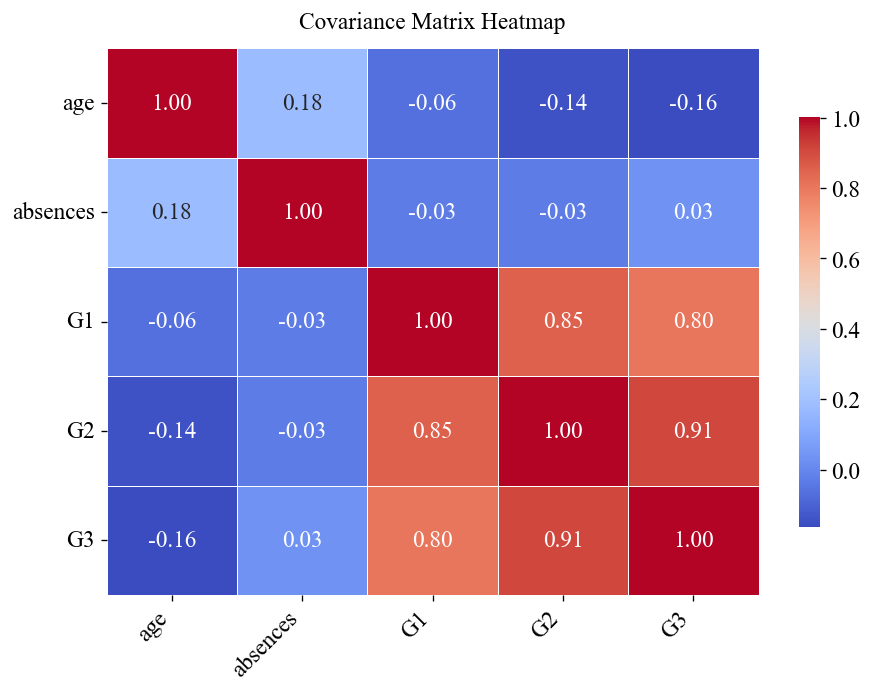

In [108]:
# Select numeric features for PCA
features = ['age', 'absences', 'G1', 'G2', 'G3']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False)
cov_df = pd.DataFrame(cov_matrix, index=features, columns=features)

# Plot the covariance matrix as a heatmap
plt.figure(figsize=(8, 6), dpi=120)

sns.heatmap(
    cov_df,
    cmap='coolwarm',        # Diverging palette
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

# title and labels
plt.title('Covariance Matrix Heatmap', fontname='Times New Roman', fontsize=14, pad=12)
plt.xticks(fontname='Times New Roman', fontsize=14, rotation=45, ha='right')
plt.yticks(fontname='Times New Roman', fontsize=14, rotation=0)
plt.tight_layout()

# Save the plot
plt.savefig('Lab05_ChakerBaloch_CovarianceHeatmap.png', dpi=300)

# Show the plot
plt.show()


### Insights

This heatmap shows how each pair of features in our dataset changes together. We see that the three grade variables G1, G2, and G3 have strong positive relationships with one another. This means that students who do well in the first period usually continue to perform well in later periods.

In contrast, features like age and absences have weak or slightly negative covariances with the grades. This suggests that age and missing school do not strongly impact student performance in this dataset, at least not in a consistent way. Overall, this heatmap helps us see which variables are connected, which is important before applying PCA because PCA looks for patterns in how features vary together.



## Eigenvalues and Eigenvectors Visualization

I compute the full set of eigenvalues and eigenvectors from the covariance matrix. The eigenvalues tell us how much variance each principal component captures, while the eigenvectors show the direction that each component points to. This step is crucial in PCA because it helps identify which components are the most informative and should be kept for dimensionality reduction. The results will be visualized using a bar chart of eigenvalues and a table of the corresponding eigenvectors.


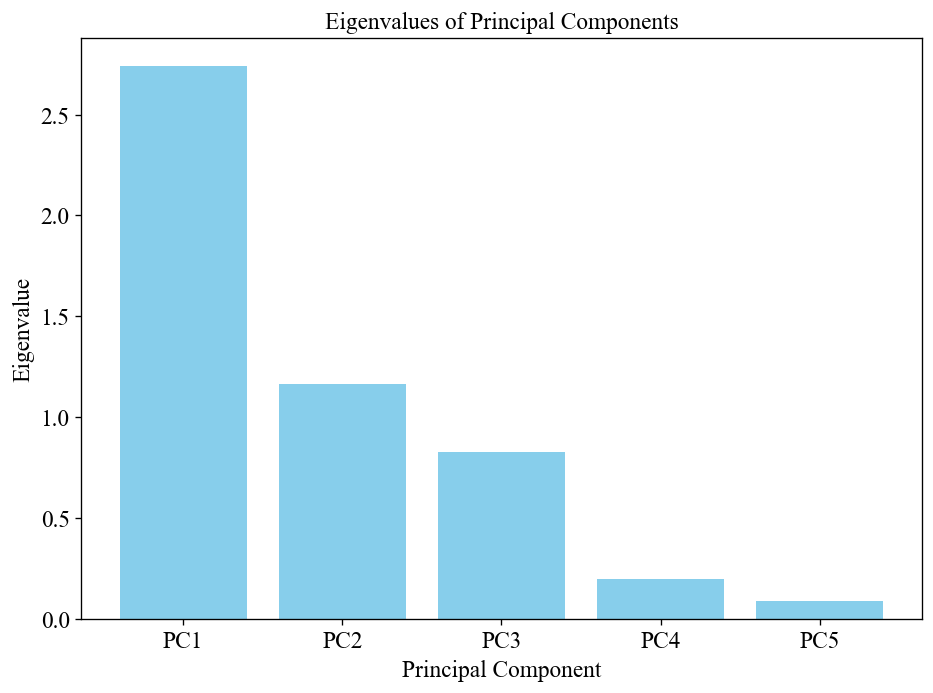

,age,absences,G1,G2,G3
PC1,0.125,0.022,-0.558,-0.585,-0.575
PC2,0.675,0.730,0.080,0.033,0.063
PC3,-0.720,0.678,-0.134,-0.044,0.045
PC4,-0.104,0.068,0.789,-0.226,-0.557
PC5,-0.006,0.043,-0.202,0.777,-0.595


In [106]:

# Select numeric features
features = ['age', 'absences', 'G1', 'G2', 'G3']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Extract eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
eigenvector_df = pd.DataFrame(eigenvectors, columns=features)

# Plot eigenvalues
plt.figure(figsize=(8, 6), dpi=120)
plt.bar(x=[f'PC{i+1}' for i in range(len(eigenvalues))], height=eigenvalues, color='skyblue')
plt.title('Eigenvalues of Principal Components', fontname='Times New Roman', fontsize=14)
plt.xlabel('Principal Component', fontname='Times New Roman', fontsize=14)
plt.ylabel('Eigenvalue', fontname='Times New Roman', fontsize=14)
plt.xticks(fontname='Times New Roman', fontsize=14)
plt.yticks(fontname='Times New Roman', fontsize=14)
plt.tight_layout()
plt.savefig('Lab05_ChakerBaloch_EigenvaluesBarChart.png', dpi=300)
plt.show()

# Display eigenvectors as a table
eigenvector_df.index = [f'PC{i+1}' for i in range(len(eigenvalues))]
eigenvector_df.round(3)


### Insights

The bar chart of eigenvalues shows that the first principal component captures the most variance, with each subsequent component explaining less. This tells us that a large part of the dataset’s structure can be represented with just the first few components, which is helpful for dimensionality reduction.

The eigenvectors table shows how each principal component is composed of the original features. For example, in the first component, G1, G2, and G3 contribute strongly with similar weights, indicating that student grades are the most dominant source of variation. In contrast, features like `age` and `absences` contribute more to later components. This aligns with our earlier findings from the covariance matrix and further supports the importance of the grade features in PCA.


## Scree Plot: Cumulative Variance

The scree plot helps us understand how much information (or variance) each principal component captures from the dataset. By plotting the cumulative variance explained, we can decide how many components to keep for reducing the dataset’s dimensionality while still preserving most of its structure. This is a crucial step in PCA because it helps simplify the dataset without losing valuable insights.


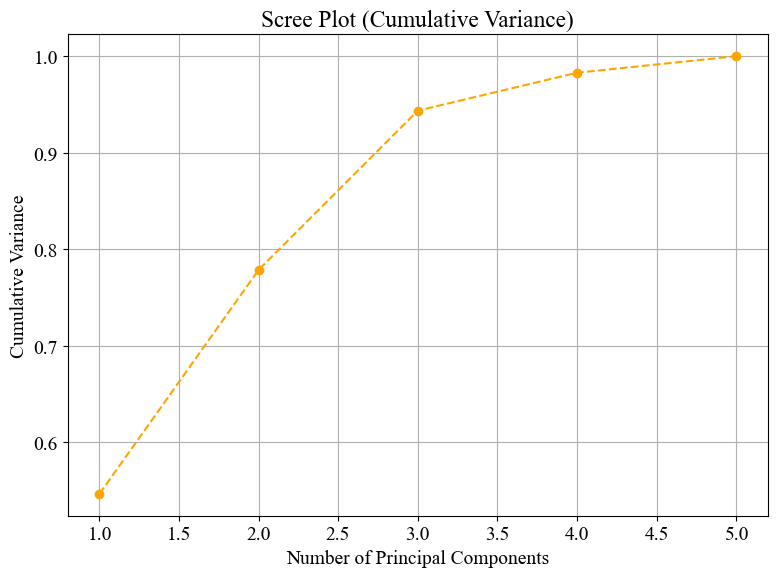

In [104]:

# Set font to Times New Roman, size 14
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 14

# Load the dataset
df = pd.read_csv('student-mat.csv', sep=';')
features = ['age', 'absences', 'G1', 'G2', 'G3']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.title('Scree Plot (Cumulative Variance)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.tight_layout()
plt.savefig('Lab05_ChakerBaloch_ScreePlot.png', dpi=300)
plt.show()


### Insights

From the scree plot, we can see that the first two principal components capture the majority of the variance in the dataset over 75%. By the third component, the cumulative variance explained is above 95%, meaning we can represent most of the dataset’s structure using just two or three components. This shows that PCA is effective for reducing dimensions here without losing much information.


## 2D PCA Projection Colored by Final Grade (G3)

This scatterplot visualizes the dataset in two dimensions using the first two principal components from PCA. Each point represents a student, and the color of the point reflects their final grade (G3). This plot allows us to observe how student performance relates to the directions of maximum variance in the dataset.


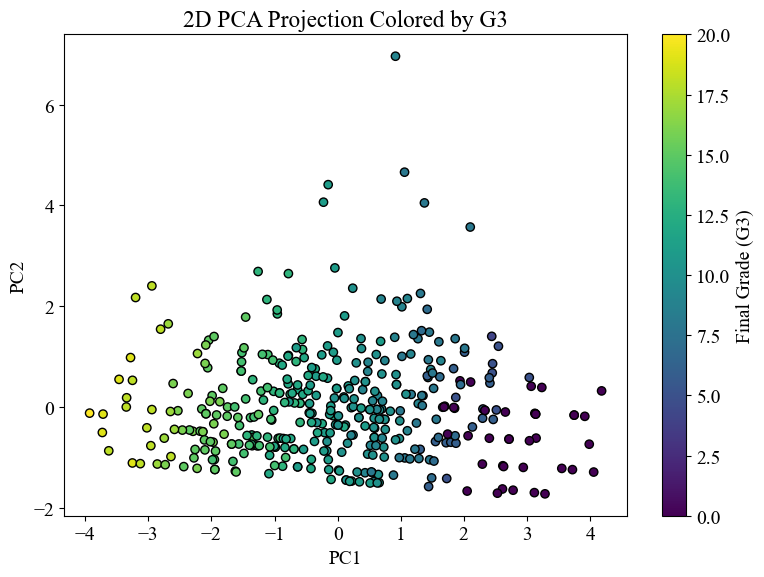

In [102]:
# Project data onto first two principal components
X_pca = pca.transform(X_scaled)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['G3'] = df['G3']  # Add G3 grade for coloring

# Plot 2D PCA projection colored by G3
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['G3'], cmap='viridis', edgecolors='k')
cbar = plt.colorbar(scatter)
cbar.set_label('Final Grade (G3)')
plt.title('2D PCA Projection Colored by G3')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('Lab05_ChakerBaloch_2DPCAColoredByG3.png', dpi=300)
plt.show()


### Insights

The scatterplot shows that students with similar final grades (G3) tend to cluster in specific regions of the PCA space. Higher-performing students appear grouped toward one side of the plot, while lower-performing students are spread differently. This pattern suggests that PCA has successfully captured meaningful differences in student performance using just two dimensions, helping us visually distinguish performance trends in a simplified way.


## PCA Biplot: Feature Contributions to Principal Components

The PCA biplot combines two useful perspectives, it shows each student projected onto the first two principal components (like the previous scatterplot) and also displays the original features as arrows. These arrows indicate the direction and magnitude of each feature’s contribution to the principal components, giving us a better understanding of what the components actually represent.


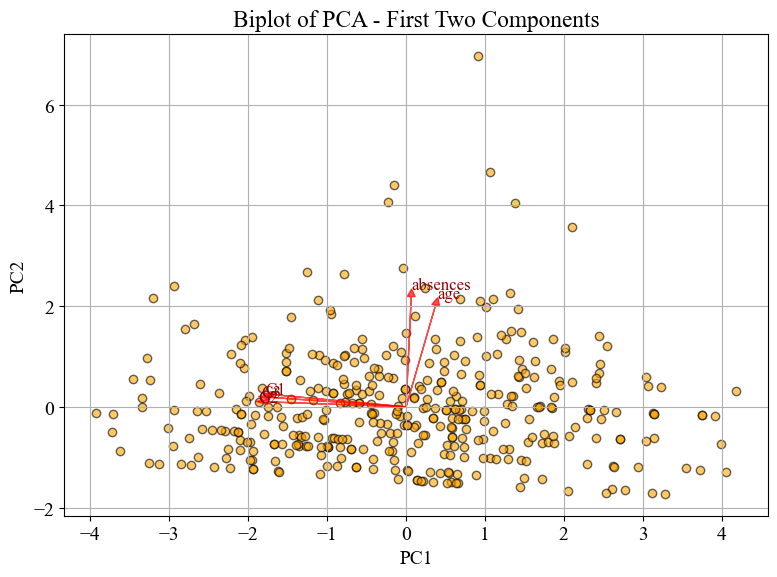

In [100]:
# Reuse already computed X_pca and PCA model

# Create a scatterplot of the PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='orange', edgecolors='k')

# Draw arrows representing the feature loadings
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i]*3, pca.components_[1, i]*3, 
              color='red', alpha=0.7, head_width=0.1)
    plt.text(pca.components_[0, i]*3.2, pca.components_[1, i]*3.2, feature, 
             color='darkred', fontsize=12, fontname='Times New Roman')

plt.title('Biplot of PCA - First Two Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.tight_layout()
plt.savefig('Lab05_ChakerBaloch_Biplot.png', dpi=300)
plt.show()


### Insights

The biplot shows how each feature contributes to the first two principal components. The arrows for `G1`, `G2`, and `G3` all point in a similar direction with strong magnitudes, suggesting they are closely related and dominant in defining PC1. In contrast, `age` and `absences` have shorter or differently angled arrows, indicating they contribute differently, possibly more to PC2. This confirms that the grade-related features are the primary drivers of variation in this dataset.
